In [1]:
## LIBRARIES
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import re

from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)

In [2]:
## Input/Output
IMPORT_FOLDER = "C:\\Users\\E2884\Desktop\\WPy64-3980\\notebooks\\ENL_Script_analyse_magasin\\data\\"
FILE = "20231003_MI20.xlsx"
FILE2 = "20231003_ZMM_EDT_ART_02.xlsx"

In [3]:
DATE_EXTRACTION = FILE[0:8]
YEAR_EXTRACTION = DATE_EXTRACTION[0:4]
MONTH_EXTRACTION = DATE_EXTRACTION[4:6]
DAY_EXTRACTION = DATE_EXTRACTION[6:8]

In [4]:
## Import data from xls to pandas
df_INV = pd.read_excel(IMPORT_FOLDER + FILE, sheet_name='Sheet1')
df_BA = pd.read_excel(IMPORT_FOLDER + FILE2, sheet_name='Sheet1')

In [5]:
## df_DATA : Rename and list columns
df_BA.rename(columns = {'N°Article':'CODE_ARTICLE',
                          'Désignation':'DESIGNATION',
                          'Emplacement':'EMPLACEMENT',
                          'Dernière sortie':'DERNIERE_SORTIE',
                          'Stock Valo Global':'QUANTITE',
                          'DIV. Point de Cmd':'QTE_MIN',
                          'DIV. Stock max':'QTE_MAX',
                          'T.sup':'TSUP',
                          'Dernière entrée':'DERNIERE_ENTREE',
                          'Dernier comptage':'DERNIER_INVENTAIRE',
                          'Dernière conso.':'DERNIERE_CONSO',
                          'Prix moy. pondéré':'PRIX_MOY_POND',
                          'Dernier mouv.':'DERNIER_MOUVEMENT',
                          'Val Stock Valo Global':'VALEUR'}, inplace = True)
for el in df_BA.columns.to_list():
    print(el)
df_BA['VALEUR'] = df_BA['VALEUR']*100

CODE_ARTICLE
DESIGNATION
Div
PJ
Mag
Typ Article
EMPLACEMENT
Gp marchandise
Gp achet.
QTE_MIN
QTE_MAX
DIV. Stock Sécurité
TyP
MG. util. libre
Unité
MG. point de Cmd
MG. Qté de réapro
Stock Valo Mag
Val Stock Valo Mag
MAG appro ext
Qté Cmd
TSUP
DERNIER_INVENTAIRE
DERNIERE_ENTREE
DERNIERE_SORTIE
DERNIERE_CONSO
DERNIER_MOUVEMENT
Domaine de valo.
Groupe de valo.
QUANTITE
VALEUR
PRIX_MOY_POND
critiques
Groupe de types de poste
Reservation
Code ABC
Gestion par lots
Temps de réception
Délai prévu de livraison


In [6]:
# Catégorie emplacement
dict_EMPL_CONFORME = {"ADEFINIR":"NON_CONFORME",
                      "BACA":"BACA\d{4}",
                      "BACB":"BACB\d{4}",
                      "CHIMIE":"CHIMIE",
                      "CLIM":"CLIM(?:(\d{4}\S|SOL))",
                      "ENCOMMANDE":"ENCOMMANDE",
                      "FUEL":"FUEL",
                      "EXTDROIT":"EXTDROIT",
                      "EXTGAUCHE":"EXTGAUCHE",
                      "GP":"GP\S\d{4}\S",
                      "HUILERIE":"HUILERIE",
                      "LABO":"LABO",
                      "MT":"MT\S{4}",
                      "MTBAC" :"MTBAC\d{2}",
                      "MZ":"MZ\S\d{4}\S",
                      "PP":"PP\S\d{4}\S",
                      "PPBAC":"PP\S\d\SBAC",
                      "PPMUR":"PPMUR\d{2}",
                      "PPRECEPT":"PPRECEPT",
                      "PR":"PR\S\d{4}\S", 
                     }

df_BA['EMPLACEMENT'] = df_BA['EMPLACEMENT'].fillna("VIDE")

list_EMPL_CONFORME = []
list_EMPL_NN_CONFORME = []
for emp in df_BA['EMPLACEMENT']:
    conformite = "NON_CONFORME"
    for key, value in dict_EMPL_CONFORME.items():
        tmp = re.findall(value, emp)
        if tmp != []:
            conformite = key
        else:
            pass
    list_EMPL_CONFORME.append(conformite)


df_BA['EMPLACEMENT_CONFORME']=list_EMPL_CONFORME
df_BA = df_BA[['CODE_ARTICLE','EMPLACEMENT','VALEUR','EMPLACEMENT_CONFORME','QUANTITE']]
print(df_BA)

       CODE_ARTICLE EMPLACEMENT    VALEUR EMPLACEMENT_CONFORME  QUANTITE
0        1000000015    PPD0530C   6651900                   PP       1.0
1        1000000016    PPD0540A  43251600                   PP       4.0
2        1000000017        VIDE         0         NON_CONFORME       0.0
3        1000000018        VIDE         0         NON_CONFORME       0.0
4        1000000019  ENCOMMANDE         0           ENCOMMANDE       0.0
...             ...         ...       ...                  ...       ...
12908    8150000032   CADENASSE         0         NON_CONFORME       0.0
12909    8150000033   CADENASSE         0         NON_CONFORME       0.0
12910    8150000034   CADENASSE         0         NON_CONFORME       0.0
12911    8150000035    ADEFINIR         0         NON_CONFORME       0.0
12912    9999999999   CADENASSE         0         NON_CONFORME       0.0

[12913 rows x 5 columns]


In [7]:
## Rename and list columns
df_INV.rename(columns = {'Article':'CODE_ARTICLE',
                          'Date de comptage':'DATE_COMPTAGE',
                          'Valeur pos. invent.':'BONI',
                          'Val. écart négative':'MALI',
                          'Ecart (montant)':'ECART_VA'}, inplace = True)
for el in df_INV.columns.to_list():
    print(el)
df_INV = df_INV[:-1]
df_INV = df_INV[['CODE_ARTICLE','BONI','MALI','DATE_COMPTAGE','ECART_VA']]
df_INV['ECART'] = df_INV['BONI']+df_INV['MALI']
print(df_INV)

Document inventaire
Poste
Magasin
Division
CODE_ARTICLE
Désignation article
Unité de qté base
Quantité théorique
Quantité comptée
Quantité d'écart
BONI
Devise
MALI
Statut inventaire
Exercice comptable
DATE_COMPTAGE
ECART_VA
       CODE_ARTICLE  BONI   MALI DATE_COMPTAGE  ECART_VA  ECART
0      1.101116e+09     0      0    2009-12-12       0.0      0
1      1.101662e+09     0      0    2009-12-12       0.0      0
2      1.102458e+09     0      0    2009-12-12       0.0      0
3      1.102482e+09     0      0    2009-12-12       0.0      0
4      1.102482e+09     0      0    2009-12-12       0.0      0
...             ...   ...    ...           ...       ...    ...
49096  1.200000e+09     0 -13197    2023-06-23   13197.0 -13197
49097  1.200000e+09     0      0    2023-06-23       0.0      0
49098  1.200000e+09     0      0    2023-06-23       0.0      0
49099  2.105010e+09     0      0    2023-06-23       0.0      0
49100  1.200000e+09     0      0    2023-06-23       0.0      0

[49101 

In [8]:
df_MERGE = pd.merge(df_INV,df_BA, on=['CODE_ARTICLE'])
print(df_MERGE)

       CODE_ARTICLE  BONI  MALI DATE_COMPTAGE  ECART_VA  ECART EMPLACEMENT  \
0      1.101116e+09     0     0    2009-12-12       0.0      0    BACB1105   
1      1.101116e+09     0     0    2011-05-24       0.0      0    BACB1105   
2      1.101116e+09     0     0    2012-02-10       0.0      0    BACB1105   
3      1.101116e+09     0     0    2014-11-03       0.0      0    BACB1105   
4      1.101116e+09     0     0    2016-08-30       0.0      0    BACB1105   
...             ...   ...   ...           ...       ...    ...         ...   
49096  1.200000e+09     0     0    2023-06-23       0.0      0    MZE0530A   
49097  1.200000e+09     0     0    2023-06-23       0.0      0    MZE0530A   
49098  1.200000e+09     0     0    2023-06-23       0.0      0    MZE0530A   
49099  1.200000e+09     0     0    2023-06-23       0.0      0    MZE0530A   
49100  1.200000e+09     0     0    2023-06-23       0.0      0    MZE0530A   

         VALEUR EMPLACEMENT_CONFORME  QUANTITE  
0       392890

In [9]:
## INVENTAIRE 
df_MERGE['YM_COMPTAGE'] = df_MERGE['DATE_COMPTAGE'].dt.strftime('%Y-%m')
df_MERGE_gb_YM_COMPTAGE = df_MERGE.groupby('YM_COMPTAGE').agg({'CODE_ARTICLE':'count','BONI':'sum','MALI':'sum','ECART':'sum'})
print(df_MERGE_gb_YM_COMPTAGE)

             CODE_ARTICLE      BONI     MALI     ECART
YM_COMPTAGE                                           
2009-12               164         0        0         0
2010-05                31         0        0         0
2010-06                50         0   -16207    -16207
2011-04               105     50546  -267469   -216923
2011-05              2067   4044853 -6883585  -2838732
...                   ...       ...      ...       ...
2023-02               388    745739 -2909182  -2163443
2023-03              4631   5369465 -3715942   1653523
2023-04                22         0 -1253298  -1253298
2023-05               142    301696  -252119     49577
2023-06               531  27197326 -2301136  24896190

[90 rows x 4 columns]


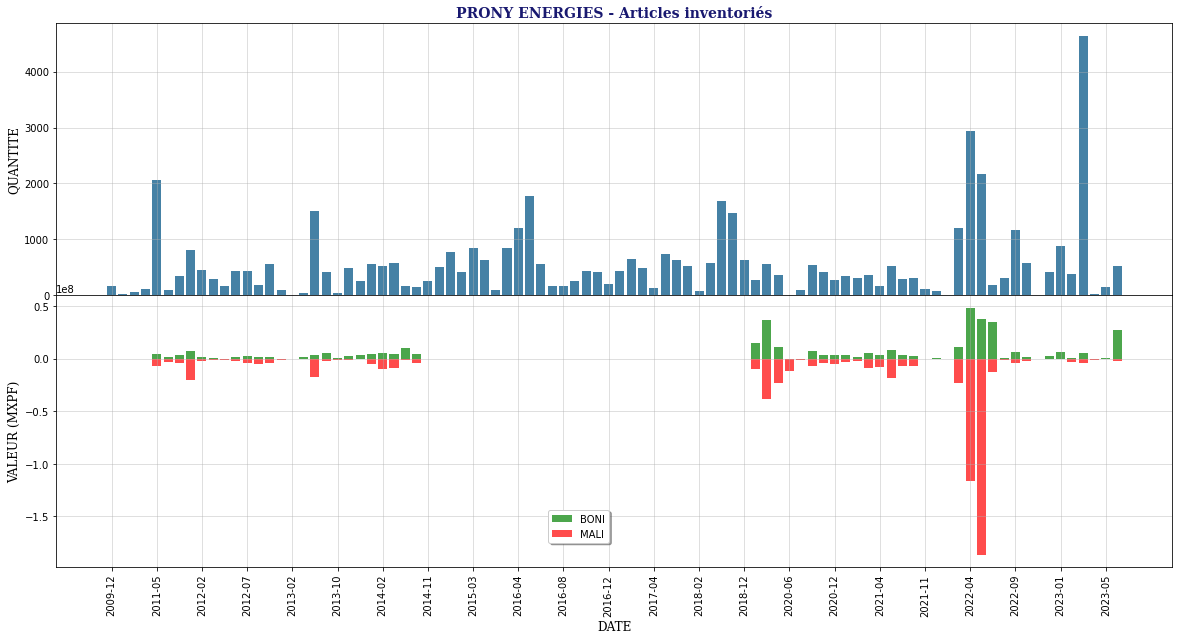

In [10]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Articles inventoriés"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Graphique n°1
# Paramètres d'axes
x_label = "DATE"
xtick_rotation = 90

y_label = "QUANTITE"
ybis_label = "VALEUR (MXPF)"

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y0_color = 'royalblue'
y0_alpha = 0.6
y0_label = 'Nombre articles inventoriés'

# Graphique n°2
y1_color = 'green'
y1_alpha = 0.7
y1_label = 'BONI'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'MALI'

# # Paramètres texte instructions
# texte = "Ces données n'incluent pas le charbon \n\
# et les articles n'étant jamais sortis"

# text_x = -5
# text_y = 240
# text_family = 'serif'  
# text_color = 'black'
# text_weight = 'light'   
# text_size = 12
# bbox_facecolor = 'lemonchiffon'
# bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################

fig, axe1 = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# # Texte instructions
# plt.text(-5, 240, texte, 
#          fontdict={'family': text_family,'color' : text_color,'weight': text_weight,'size': text_size}, 
#          bbox = {'facecolor' : bbox_facecolor, 'alpha' : bbox_alpha})

# Graphique n°1
axe1[0].set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1[0].set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1[0].set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1[0].bar(df_MERGE_gb_YM_COMPTAGE.index.values, df_MERGE_gb_YM_COMPTAGE.CODE_ARTICLE, color= y1_color, alpha = y1_alpha, label=y1_label)

axe1[0].set_xticks(df_MERGE_gb_YM_COMPTAGE.index.values[::4])
axe1[0].legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1[0].grid(True, alpha=grid_alpha)

# Graphique n°1
axe1[0].set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1[0].set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1[0].set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1[0].bar(df_MERGE_gb_YM_COMPTAGE.index.values, df_MERGE_gb_YM_COMPTAGE.CODE_ARTICLE, color= y0_color, alpha = y0_alpha, label=y0_label)

axe1[0].set_xticks(df_MERGE_gb_YM_COMPTAGE.index.values[::4])
axe1[0].legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1[0].grid(True, alpha=grid_alpha)

# Graphique n°2
axe1[1].set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1[1].set_ylabel(ybis_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1[1].bar(df_MERGE_gb_YM_COMPTAGE.index.values, df_MERGE_gb_YM_COMPTAGE.BONI, color= y1_color, alpha = y1_alpha, label=y1_label)
axe1[1].bar(df_MERGE_gb_YM_COMPTAGE.index.values, df_MERGE_gb_YM_COMPTAGE.MALI, color= y2_color, alpha = y2_alpha, label=y2_label)

axe1[1].set_xticks(df_MERGE_gb_YM_COMPTAGE.index.values[::4])
axe1[1].legend(loc="center right",bbox_to_anchor=(0.5, 0.15), ncol=1, fancybox=True, shadow=True)
axe1[1].grid(True, alpha=grid_alpha)

In [11]:
## INVENTAIRE sur l'exercice
DATE_INV_EXERCICE = '2022-07-01'
df_MERGE_INV_EX = df_MERGE[df_MERGE.DATE_COMPTAGE >= DATE_INV_EXERCICE]

df_MERGE_INV_EX['YW_COMPTAGE'] = df_MERGE_INV_EX['DATE_COMPTAGE'].dt.strftime('%Y-%W')
df_MERGE_INV_EX_gb_YW_COMPTAGE = df_MERGE_INV_EX.groupby('YW_COMPTAGE').agg({'CODE_ARTICLE':'count','BONI':'sum','MALI':'sum','ECART':'sum'})
print(df_MERGE_INV_EX_gb_YW_COMPTAGE)


NOMBRE_ARTICLE_INVENTORIE_EX = round(df_MERGE_INV_EX['CODE_ARTICLE'].count(),2)
NOMBRE_UARTICLE_INVENTORIE_EX = round(df_MERGE_INV_EX['CODE_ARTICLE'].nunique(),2)
COMPTAGE_MOYEN = round(NOMBRE_ARTICLE_INVENTORIE_EX/NOMBRE_UARTICLE_INVENTORIE_EX,2)
BONI_EX = round(df_MERGE_INV_EX['BONI'].sum(),2)
MALI_EX = round(df_MERGE_INV_EX['MALI'].sum(),2)
ECART_EX = round(BONI_EX+MALI_EX,2)

print("")
print("INVENTAIRE SUR L'EXERCICE")
print("{:<35} --> {:<7}".format("Nombre de comptage",NOMBRE_ARTICLE_INVENTORIE_EX))
print("{:<35} --> {:<7}".format("Nombre d'article inventorié",NOMBRE_UARTICLE_INVENTORIE_EX))
print("{:<35} --> {:<7}".format("Comptage moyen par article",COMPTAGE_MOYEN))
print("{:<35} --> {:<7} XPF".format("BONI total sur ex",BONI_EX))
print("{:<35} --> {:<7} XPF".format("MALI total sur ex",MALI_EX))
print("{:<35} --> {:<7} XPF".format("ECART sur ex",ECART_EX))

             CODE_ARTICLE      BONI     MALI     ECART
YW_COMPTAGE                                           
2022-32                28         0  -829392   -829392
2022-34               114      1564   -11114     -9550
2022-35               158    263441  -227176     36265
2022-36               436    925675  -128730    796945
2022-37               278   1873429 -2030505   -157076
2022-38               452   3325512 -2242940   1082572
2022-41               157         0        0         0
2022-42               426   1812859 -2158841   -345982
2022-46                 8         0        0         0
2022-49               177         0        0         0
2022-50                19   2900937    -8564   2892373
2022-51               216    106687  -220077   -113390
2023-02               258         0   -33016    -33016
2023-03               414   5990334   -85559   5904775
2023-04               213    720103        0    720103
2023-05                18     80098 -1450062  -1369964
2023-06   

C:\Users\E2884\AppData\Local\Temp/ipykernel_14560/988912667.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_MERGE_INV_EX['YW_COMPTAGE'] = df_MERGE_INV_EX['DATE_COMPTAGE'].dt.strftime('%Y-%W')


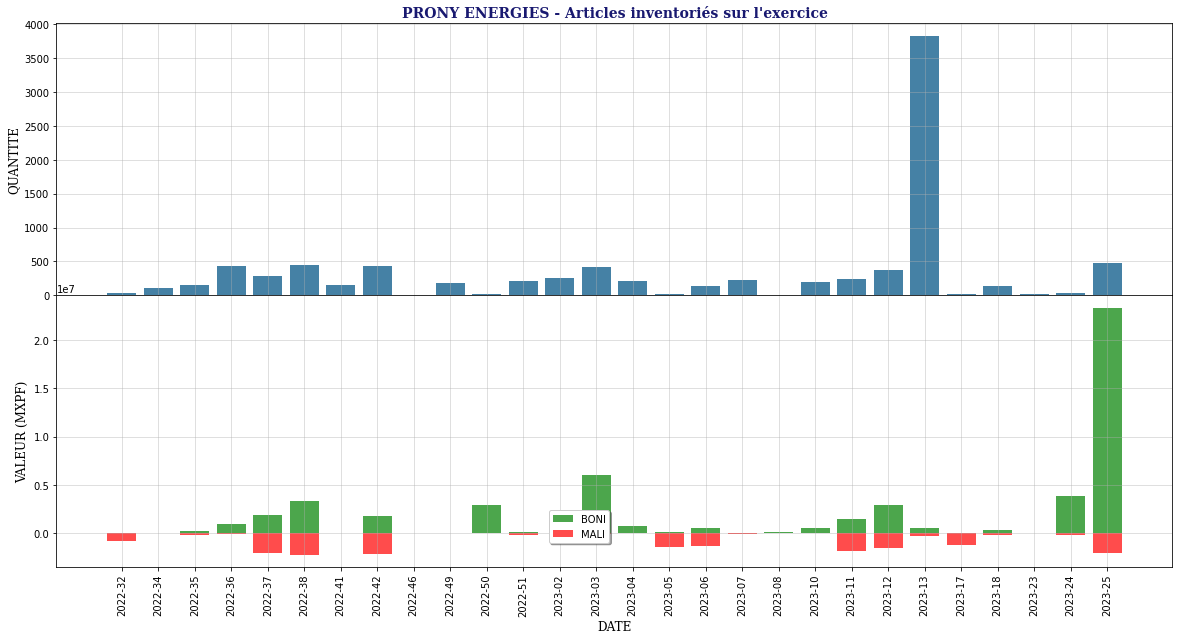

In [12]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - Articles inventoriés sur l'exercice"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Graphique n°1
# Paramètres d'axes
x_label = "DATE"
xtick_rotation = 90

y_label = "QUANTITE"
ybis_label = "VALEUR (MXPF)"

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y0_color = 'royalblue'
y0_alpha = 0.6
y0_label = 'Nombre articles inventoriés'

# Graphique n°2
y1_color = 'green'
y1_alpha = 0.7
y1_label = 'BONI'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'MALI'

# # Paramètres texte instructions
# texte = "Ces données n'incluent pas le charbon \n\
# et les articles n'étant jamais sortis"

# text_x = -5
# text_y = 240
# text_family = 'serif'  
# text_color = 'black'
# text_weight = 'light'   
# text_size = 12
# bbox_facecolor = 'lemonchiffon'
# bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################

fig, axe1 = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# # Texte instructions
# plt.text(-5, 240, texte, 
#          fontdict={'family': text_family,'color' : text_color,'weight': text_weight,'size': text_size}, 
#          bbox = {'facecolor' : bbox_facecolor, 'alpha' : bbox_alpha})

# Graphique n°1
axe1[0].set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1[0].set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1[0].set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1[0].bar(df_MERGE_INV_EX_gb_YW_COMPTAGE.index.values, df_MERGE_INV_EX_gb_YW_COMPTAGE.CODE_ARTICLE, color= y1_color, alpha = y1_alpha, label=y1_label)

axe1[0].set_xticks(df_MERGE_INV_EX_gb_YW_COMPTAGE.index.values[::1])
axe1[0].legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1[0].grid(True, alpha=grid_alpha)

# Graphique n°1
axe1[0].set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1[0].set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1[0].set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1[0].bar(df_MERGE_INV_EX_gb_YW_COMPTAGE.index.values, df_MERGE_INV_EX_gb_YW_COMPTAGE.CODE_ARTICLE, color= y0_color, alpha = y0_alpha, label=y0_label)

axe1[0].set_xticks(df_MERGE_INV_EX_gb_YW_COMPTAGE.index.values[::2])
axe1[0].legend(loc="center right",bbox_to_anchor=(0.3, -0.15), ncol=1, fancybox=True, shadow=True)
axe1[0].grid(True, alpha=grid_alpha)

# Graphique n°2
axe1[1].set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1[1].set_ylabel(ybis_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1[1].bar(df_MERGE_INV_EX_gb_YW_COMPTAGE.index.values, df_MERGE_INV_EX_gb_YW_COMPTAGE.BONI, color= y1_color, alpha = y1_alpha, label=y1_label)
axe1[1].bar(df_MERGE_INV_EX_gb_YW_COMPTAGE.index.values, df_MERGE_INV_EX_gb_YW_COMPTAGE.MALI, color= y2_color, alpha = y2_alpha, label=y2_label)

axe1[1].set_xticks(df_MERGE_INV_EX_gb_YW_COMPTAGE.index.values[::1])
axe1[1].legend(loc="center right",bbox_to_anchor=(0.5, 0.15), ncol=1, fancybox=True, shadow=True)
axe1[1].grid(True, alpha=grid_alpha)

In [13]:
## NOMBRE DE COMPTAGE MOYEN
df_MERGE_gb_EMPL = df_MERGE.groupby('EMPLACEMENT_CONFORME').agg({'CODE_ARTICLE':'count','BONI':'sum','MALI':'sum','ECART':'sum'})
print(df_MERGE_gb_EMPL)

                      CODE_ARTICLE       BONI       MALI      ECART
EMPLACEMENT_CONFORME                                               
BACA                          1676    2741798   -1635439    1106359
BACB                          1101    2394272   -1968512     425760
CHIMIE                          18          0          0          0
CLIM                           117    3297219   -1492395    1804824
ENCOMMANDE                     304    3562110   -6044796   -2482686
EXTDROIT                       172   15850112   -9954386    5895726
EXTGAUCHE                       52     201907    -739355    -537448
FUEL                             5    1576258   -2129421    -553163
GP                            4547  153050506 -152709735     340771
HUILERIE                        62    4558519  -10888175   -6329656
LABO                           128    1914416    -961614     952802
MT                              50          0    -185882    -185882
MTBAC                            2      18678   

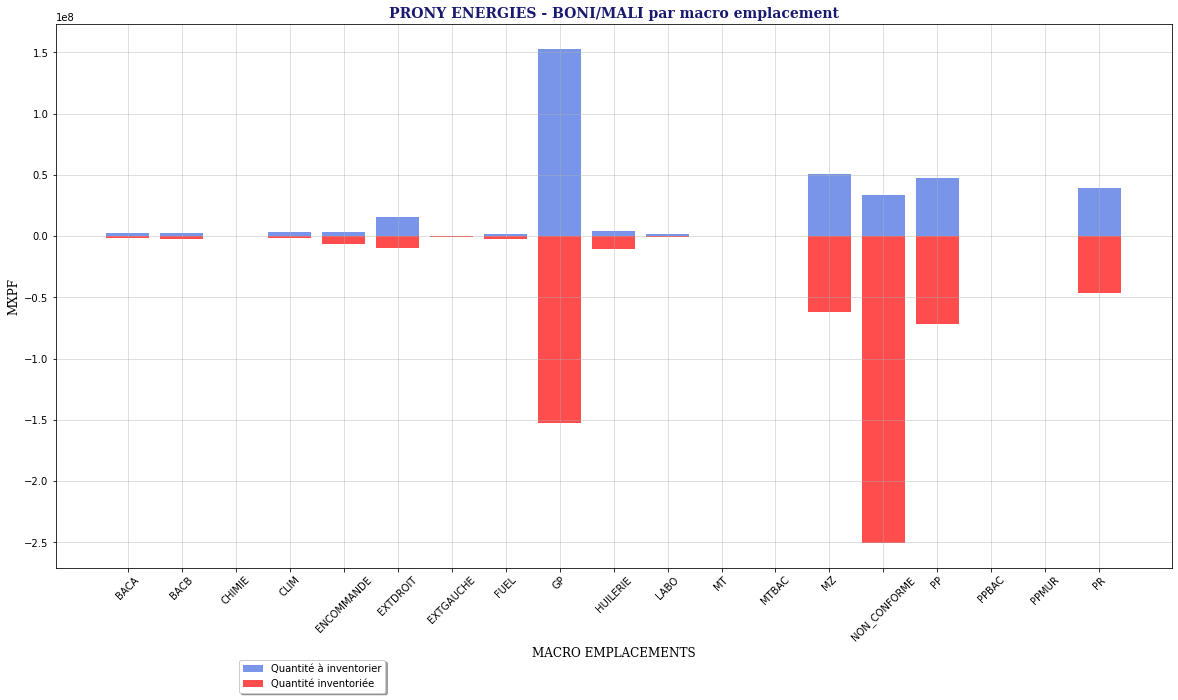

In [14]:
## GRAPHIQUE MATPLOTLIB
# Paramètres Titre
graph_title = "PRONY ENERGIES - BONI/MALI par macro emplacement"
title_family = 'serif'   # 'serif' | 'sans-serif' | 'cursive' | 'fantasy' | 'monospace'
title_color = 'midnightblue'
title_weight = 'bold'    # 'normal' | 'bold' | 'heavy' | 'light' | 'ultrabold' | 'ultralight'
title_size = 14
title_x = 0.5
title_y = 1

# Paramètres d'axes
x_label = "MACRO EMPLACEMENTS"
xtick_rotation = 45

y_label = "MXPF"
# y2_label = "XPF"

xy_label_family = 'serif'
xy_label_color = 'black'
xy_label_weight = 'light'
xy_label_size = 12

y1_color = 'royalblue'
y1_alpha = 0.7
y1_label = 'Quantité à inventorier'

y2_color = 'red'
y2_alpha = 0.7
y2_label = 'Quantité inventoriée'

# graph_linestyle = 'solid'

# # Paramètres texte instructions
# texte = "Ces données n'incluent pas le charbon \n\
# et les articles n'étant jamais sortis"

# text_x = -5
# text_y = 240
# text_family = 'serif'  
# text_color = 'black'
# text_weight = 'light'   
# text_size = 12
# bbox_facecolor = 'lemonchiffon'
# bbox_alpha = 0.5

# Paramètres grille
grid_alpha = 0.5

###########################################################################################################
fig, axe1 = plt.subplots(nrows=1, ncols=1, figsize=(20,10), sharex=True)
fig.subplots_adjust(hspace=0)

plt.xticks(rotation=xtick_rotation)

# Axe n°1
axe1.set_title(graph_title, x=title_x, y=title_y,fontdict={'family': title_family,'color' : title_color,'weight': title_weight,'size': title_size})
axe1.set_xlabel(x_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})
axe1.set_ylabel(y_label, fontdict={'family': xy_label_family,'color' : xy_label_color,'weight': xy_label_weight,'size': xy_label_size})

axe1.bar(df_MERGE_gb_EMPL.index.values, df_MERGE_gb_EMPL.BONI, color=y1_color, alpha = y1_alpha, label=y1_label)
axe1.bar(df_MERGE_gb_EMPL.index.values, df_MERGE_gb_EMPL.MALI, color=y2_color, alpha = y2_alpha, label=y2_label)


axe1.legend(loc="center right",bbox_to_anchor=(0.3, -0.20), ncol=1, fancybox=True, shadow=True)
axe1.grid(True, alpha=grid_alpha)